BAYES INGENUO

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split


CARGA DEL SET DE DATOS

In [8]:
data = pd.read_csv('./Clasificacion_banco.csv')#CAMBIEN EL 
#DIRECTORIO DEL ARCHIVO


PREPROCESAMIENTO

In [9]:
X = data.drop('not.fully.paid', axis=1)  # SE PONEN TODAS LA VARIABLES PREDICTORAS Y SE DROPEA LA QUE ES TARGET
y = data['not.fully.paid']  # PONEMOS NUESTRO CAMPO OBJETIVO O TARGET

Manejo de Variables Categoricas

In [10]:
# SE CODIFICAN LAS VARIABLES CATEGORICAS O "DUMMIES"
X = pd.get_dummies(X, drop_first=True)


Entrenamiento y Prueba del Modelo

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

MODELO DEL BAYES INGENUO

In [12]:
# SE TRABAJA EL MODELO NAIVES BAYES 
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

PREDICCIONES

In [13]:
# SE REALIZAN LAS PREDICCIONES DEL MODELO ANTES MENCIONADAS
y_pred = model.predict(X_test)

EVALUACION DEL MODELO NAIVES BAYES

In [14]:
# CODIGO DEL REPORTE
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2309   99]
 [ 424   42]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2408
           1       0.30      0.09      0.14       466

    accuracy                           0.82      2874
   macro avg       0.57      0.52      0.52      2874
weighted avg       0.76      0.82      0.78      2874



MATRIZ DE CONFUSION NAIVES BAYES

In [15]:
cm = confusion_matrix(y_test, y_pred)

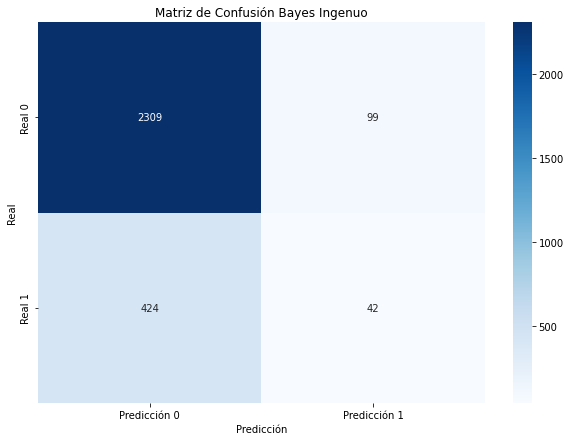

In [16]:

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicción 0', 'Predicción 1'], 
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión Bayes Ingenuo')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

REPORTE RESUMEN

In [17]:
# CODIGO DEL REPORTE
TN, FP, FN, TP = cm.ravel()
print(f"Verdaderos Negativos (TN): {TN} (el modelo predijo 0 y la clase real era 0).")
print(f"Falsos Positivos (FP): {FP} (el modelo predijo 1 pero la clase real era 0).")
print(f"Falsos Negativos (FN): {FN} (el modelo predijo 0 pero la clase real era 1).")
print(f"Verdaderos Positivos (TP): {TP} (el modelo predijo 1 y la clase real era 1).")

Verdaderos Negativos (TN): 2309 (el modelo predijo 0 y la clase real era 0).
Falsos Positivos (FP): 99 (el modelo predijo 1 pero la clase real era 0).
Falsos Negativos (FN): 424 (el modelo predijo 0 pero la clase real era 1).
Verdaderos Positivos (TP): 42 (el modelo predijo 1 y la clase real era 1).


CURVA ROC

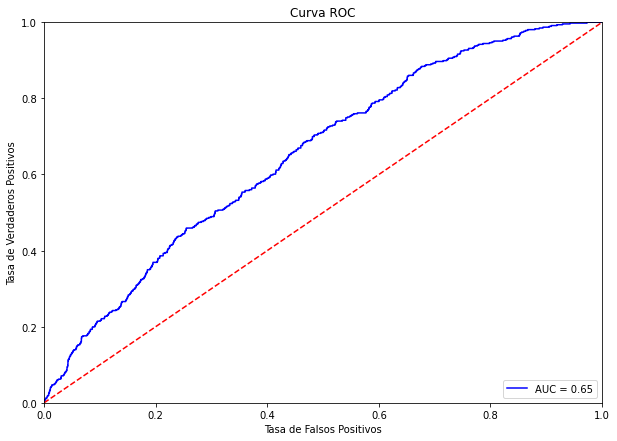

In [18]:
from sklearn.metrics import roc_curve, auc

# SE OBTIENEN LAS PROBABILIDADES DE LA PREDICCIÓN
y_probs = model.predict_proba(X_test)[:, 1]  # PROBABILIDADES PARA LA PARTE POSITIVA

# CALCULO DE LA CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# GRAFICA DE LA CURVA ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label='AUC = %.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # LINEA DE REFERENCIA ROJA
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Matriz de Confusión Normalizada

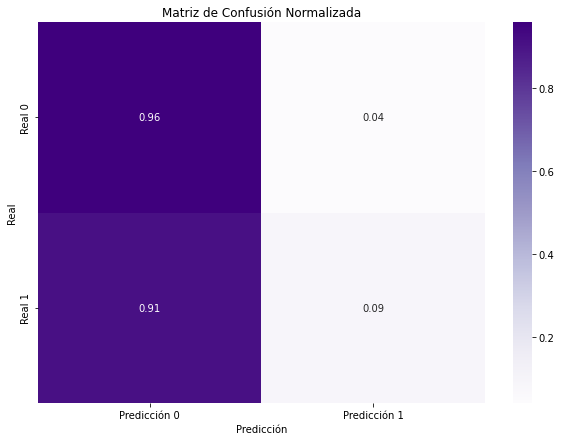

In [19]:
# Matriz de confusión normalizada
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Graficar la matriz de confusión normalizada
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Purples', 
            xticklabels=['Predicción 0', 'Predicción 1'], 
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión Normalizada')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


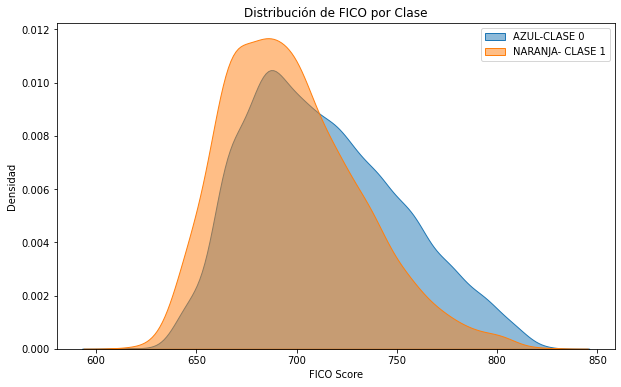

In [20]:
# USANDO LA PUNTUACION DEL CAMPO FICO DEL SET DE DATOS
plt.figure(figsize=(10, 6))
sns.kdeplot(data.loc[data['not.fully.paid'] == 0, 'fico'], label='AZUL-CLASE 0', fill=True, alpha=0.5)
sns.kdeplot(data.loc[data['not.fully.paid'] == 1, 'fico'], label='NARANJA- CLASE 1', fill=True, alpha=0.5)
plt.title('Distribución de FICO por Clase')
plt.xlabel('FICO Score')
plt.ylabel('Densidad')
plt.legend()
plt.show()


Hay dos curvas, una para cada clase de la variable not.fully.paid:
Clase 0 (color AZUL): Representa a aquellos prestatarios que pagaron completamente su préstamo.
Clase 1 (color NARANJA): Representa a aquellos prestatarios que no pagaron completamente su préstamo.
Cada curva indica la concentración de puntuaciones FICO en la clase correspondiente. Las áreas donde las curvas son más altas indican una mayor densidad de prestatarios con esa puntuación específica.



Interpretación de las Curvas:

Clase AZUL (Pagadores Completos):
Es probable que la mayoría de los prestatarios en esta clase tengan puntuaciones FICO más altas. Esto puede indicar que los prestatarios que pagan sus préstamos tienden a tener un mejor historial crediticio.
Clase NARANJA (No Pagadores):
Es probable que esta curva esté más desplazada hacia puntuaciones FICO más bajas. Esto sugiere que los prestatarios que no pagaron sus préstamos tienden a tener un historial crediticio menos favorable.



Conclusión:

Este gráfico es útil para visualizar la relación entre la puntuación FICO y la probabilidad de que un prestatario no pague su préstamo.
Al observar que una gran parte de los prestatarios que no pagaron tienen puntuaciones FICO más bajas, se podría inferir que la puntuación de crédito es un factor importante en la capacidad de pago de un prestatario.

DISCRIMINANTE LINEAL

Se corrigen Variables Categoricas

In [21]:
data = pd.get_dummies(data, drop_first=True)

Se preparan los datos y se clasifica como Booleana a la variable target not.fully.paid

In [22]:
data['not.fully.paid'] = data['not.fully.paid'].astype(bool)

Se realiza la selección de la Variable Objetivo y sus características

In [23]:
X = data.drop(columns=['not.fully.paid'])
y = data['not.fully.paid']

Se hace el Training y la prueba

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Se Crea el Modelo de Discriminante (o determinante Lineal) LDA

In [25]:
lda = LDA()

In [26]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Se realiza el ajuste del Modelo a las caracteristicas de la Base

In [27]:
y_pred = lda.predict(X_test)

Se realiza el ajuste del Modelo a las caracteristicas de la Base

In [28]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.84      0.99      0.91      2408
        True       0.52      0.05      0.09       466

    accuracy                           0.84      2874
   macro avg       0.68      0.52      0.50      2874
weighted avg       0.79      0.84      0.78      2874



El resultado del informe muestra que el modelo tiene una alta precisión para predecir los casos donde not.full.payd es False (0.84), pero un rendimiento muy bajo para predecir cuando es True (0.52 de precisión y 0.05 de recall). El recall bajo para True indica que el modelo falla en identificar correctamente estos casos, y el f1-score de 0.09 refleja este desequilibrio. Aunque la precisión general es del 84%, el modelo tiene dificultades con la clase minoritaria (True), lo que puede deberse al desbalance en las clases.

In [29]:
cm = confusion_matrix(y_test, y_pred)

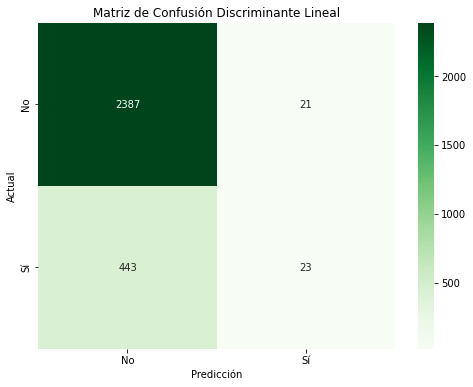

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión Discriminante Lineal')
plt.show()

Visualiación del rendimiento del modelo en términos de tasa de verdaderos positivos y tasa de falsos positivos.

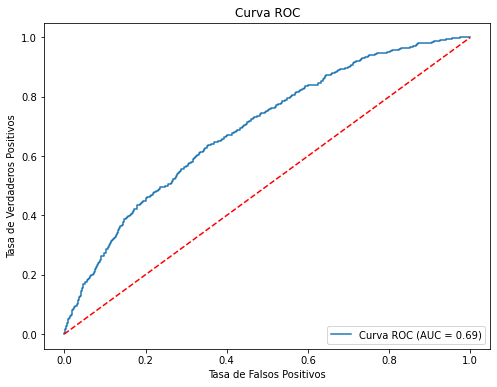

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# SE OBTIENEN LAS PROBABILIDADES DE LA PREDICCIÓN
y_scores = lda.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

#GRAFICA DE LA CURVA ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # LINEA DE REFERENCIA ROJA
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Curva de Precisión-Recuperación
Esta curva es más informativa cuando hay un desequilibrio de clases como en este caso con este algoritmo

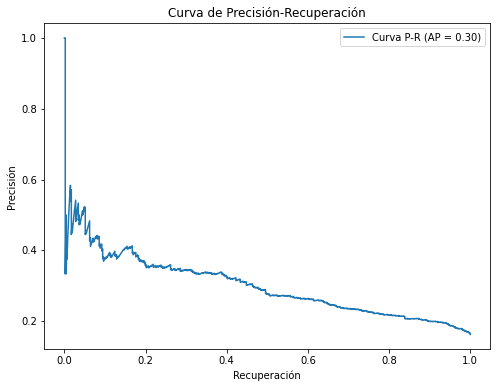

In [32]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcular precisión y recuperación para diferentes umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calcular el Average Precision Score
average_precision = average_precision_score(y_test, y_scores)

# Graficar la curva de precisión-recuperación
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Curva P-R (AP = {average_precision:.2f})')
plt.xlabel('Recuperación')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recuperación')
plt.legend(loc='upper right')
plt.show()

 Un área bajo la curva más alta indica mejor rendimiento

Visualización de las Discriminantes Lineales

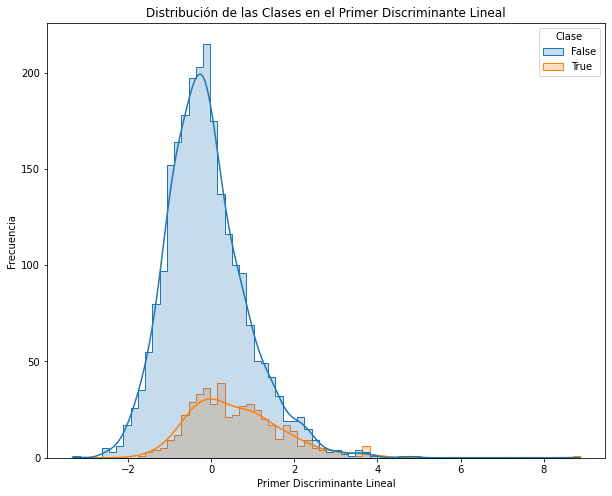

In [33]:
# Transformación los datos de prueba al espacio LDA
X_test_lda = lda.transform(X_test)

# Creación un DataFrame para facilitar la visualización
df_lda = pd.DataFrame()
df_lda['LD1'] = X_test_lda[:, 0]
df_lda['Clase'] = y_test.reset_index(drop=True)

# Graficación de las distribuciones
plt.figure(figsize=(10, 8))
sns.histplot(data=df_lda, x='LD1', hue='Clase', kde=True, element='step')
plt.title('Distribución de las Clases en el Primer Discriminante Lineal')
plt.xlabel('Primer Discriminante Lineal')
plt.ylabel('Frecuencia')
plt.show()


Si las distribuciones de las clases se superponen mucho, el modelo tiene dificultad para separarlas

 Gráfico de Importancia de las Características

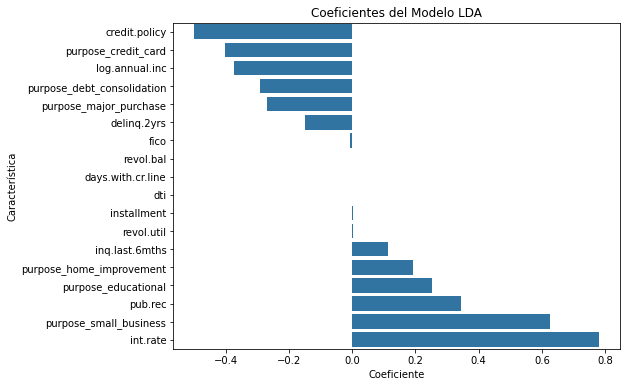

In [34]:
# Extraer los coeficientes del modelo
coef_df = pd.DataFrame({
    'Característica': X.columns,
    'Coeficiente': lda.coef_[0]
})

# Graficar los coeficientes
plt.figure(figsize=(8, 6))
sns.barplot(x='Coeficiente', y='Característica', data=coef_df.sort_values(by='Coeficiente'))
plt.title('Coeficientes del Modelo LDA')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.show()


DISCRIMINANTE CUADRÁTICO QDA

In [35]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Crear el modelo de QDA
qda = QuadraticDiscriminantAnalysis()

# Ajustar el modelo
qda.fit(X_train, y_train)

# Hacer predicciones
y_pred_qda = qda.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred_qda))

              precision    recall  f1-score   support

       False       0.86      0.87      0.86      2408
        True       0.28      0.28      0.28       466

    accuracy                           0.77      2874
   macro avg       0.57      0.57      0.57      2874
weighted avg       0.77      0.77      0.77      2874



Los resultados del Análisis Discriminante Lineal (LDA) y el Análisis Discriminante Cuadrático (QDA) presentan similitudes y diferencias notables en relación a "no pagado completamente":

Precisión y Recall: LDA muestra un mejor rendimiento en la clase "pagado completamente" (0.84 de precisión) y un rendimiento más bajo en "no pagado completamente" (0.52). QDA tiene un mejor rendimiento para "pagado completamente" (0.86), pero un rendimiento inferior en "no pagado completamente" (0.28).

F1-Score: Ambos modelos tienen un F1-score similar para "pagado completamente", pero QDA presenta un desempeño inferior en "no pagado completamente".

Accuracy: LDA tiene una exactitud del 84%, mientras que QDA muestra 77%.

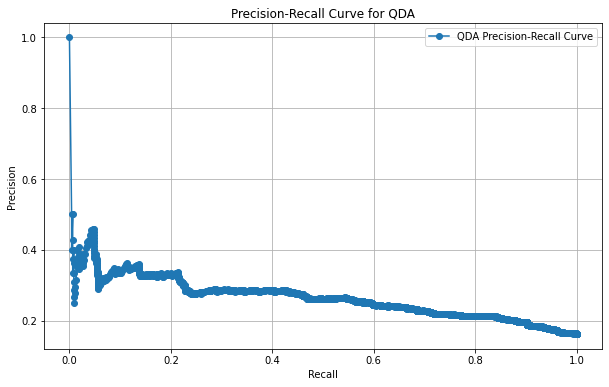

In [36]:
# Predecir las probabilidades para la clase positiva
y_scores = qda.predict_proba(X_test)[:, 1]

# Calcular precisión y recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='o', label='QDA Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for QDA')
plt.legend()
plt.grid()
plt.show()

La coordenada 𝑥=0 𝑦=1 significa que, con un umbral de decisión de 0, el modelo clasifica todas las instancias como positivas, logrando una precisión perfecta. A medida que el umbral aumenta entre 0 y 0.2, el recall (capacidad de detectar verdaderos positivos) se mantiene alto, pero al llegar a 𝑥=1, la precisión disminuye notablemente. Esto refleja el típico trade-off (compensación) entre precisión y recall en modelos de clasificación

In [37]:
# Código que puedes agregar para realizar el análisis de SVM

# Paso 1: Exploración y limpieza de datos (ajustar según tus datos específicos)
# Asumimos que el dataframe se llama `data` como en el notebook.
# Comprobar valores nulos y tipos de datos
print("Información del dataset:\n", data.info())
print("\nValores nulos por columna:\n", data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   bool   
 13  purpose_credit_card         9578 

In [38]:
# Paso 2: Selección de características (ajustar con las columnas que prefieras usar)
# Aquí seleccionamos las variables que creemos serán más relevantes para la predicción
# Suponiendo que hay una columna llamada `target` para la variable de salida
X = data.drop(columns=['not.fully.paid'], axis=1)  # Ajusta 'target' al nombre real
y = data['not.fully.paid']




In [39]:
# Paso 3: Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [40]:
# Paso 4: Escalado de características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Paso 5: Entrenamiento del modelo SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)  # ES ENSTA LINEA SE AJUSTA EL KERNEL
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [42]:
# Paso 6: Evaluación del modelo
y_pred = svm_model.predict(X_test)
print("Matriz de confusión para SVM:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación para SVM:\n", classification_report(y_test, y_pred))

Matriz de confusión para SVM:
 [[2408    0]
 [ 466    0]]

Informe de clasificación para SVM:
               precision    recall  f1-score   support

       False       0.84      1.00      0.91      2408
        True       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

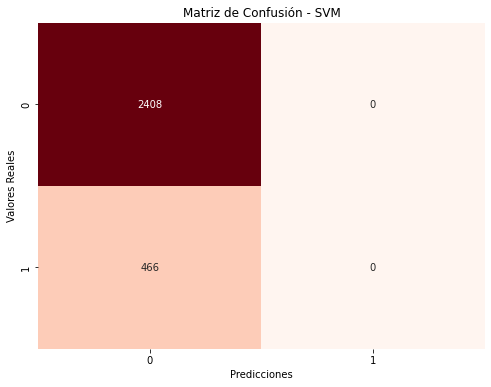

In [43]:
# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title("Matriz de Confusión - SVM")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

In [44]:
# Paso 5: Entrenamiento del modelo SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)  #LINEA DEL KERNEL
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [45]:
# Paso 6: Evaluación del modelo
y_pred = svm_model.predict(X_test)
print("Matriz de confusión para SVM:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación para SVM:\n", classification_report(y_test, y_pred))

Matriz de confusión para SVM:
 [[2407    1]
 [ 464    2]]

Informe de clasificación para SVM:
               precision    recall  f1-score   support

       False       0.84      1.00      0.91      2408
        True       0.67      0.00      0.01       466

    accuracy                           0.84      2874
   macro avg       0.75      0.50      0.46      2874
weighted avg       0.81      0.84      0.77      2874



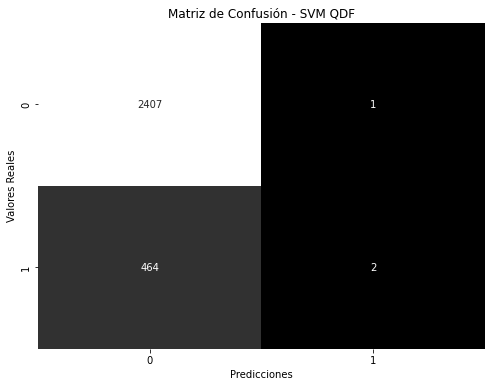

In [46]:
# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='gray', cbar=False)
plt.title("Matriz de Confusión - SVM QDF")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

In [47]:
svm_model_poly=SVC(kernel='poly', degree=10,C=1)
gamma='scale'

svm_model_poly.fit(X_train, y_train)


SVC(C=1, degree=10, kernel='poly')

In [48]:
y_pred_poly=svm_model_poly.predict(X_test)

In [49]:
print("Classification Report (Polynomial Kernel):")
print(classification_report(y_test, y_pred_poly))

Classification Report (Polynomial Kernel):
              precision    recall  f1-score   support

       False       0.84      0.94      0.89      2408
        True       0.25      0.10      0.14       466

    accuracy                           0.81      2874
   macro avg       0.55      0.52      0.52      2874
weighted avg       0.75      0.81      0.77      2874



In [50]:
print("Confusion Matrix (Polynomial Kernel):")
print(confusion_matrix(y_test, y_pred_poly))

Confusion Matrix (Polynomial Kernel):
[[2274  134]
 [ 421   45]]


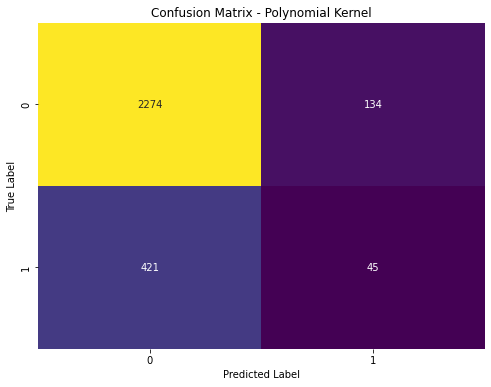

In [51]:
# Generar la matriz de confusión
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_poly, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix - Polynomial Kernel')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()